# Title

### Introduction

The Multiple Disease Prediction dataset uses various health-related parameters (such as glucose and cholesterol levels, insulin levels, and BMI) to check the health of a person - whether they are healthy or afflicted with a specific disease (Diabetes, Thalasse, Anemia, Thromboc). In this project, we set out to create a classification model to examine what disease a person with certain parameters can be diagnosed with, or if they are healthy. 

### Exploratory Data Analysis

Cool analysis

### Methods

Some methods

### Expected Outcomes

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
blood_samples <- read_csv("data/blood_samples_dataset.csv") |>
                clean_names() |>
                mutate(disease = as_factor(disease))
blood_samples

Rows: 2351 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Disease
dbl (24): Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,⋯,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.73959671,0.65019839,0.7136310,0.86849124,0.68743303,0.52989540,0.29000591,0.63104502,0.001327858,0.795828870,⋯,0.50266478,0.21556024,0.51294056,0.064187347,0.6108265,0.9394849,0.09551153,0.465956967,0.76923007,Healthy
0.12178631,0.02305844,0.9448932,0.90537215,0.50771099,0.40303319,0.16421644,0.30755321,0.207938382,0.505561858,⋯,0.85680991,0.65246533,0.10696092,0.942548790,0.3442609,0.6663681,0.65905978,0.816982046,0.40116596,Diabetes
0.45253905,0.11613494,0.5445599,0.40064025,0.29453814,0.38202135,0.62526682,0.29512172,0.868369381,0.026807746,⋯,0.46679526,0.38733206,0.42176309,0.007186305,0.5069182,0.4317036,0.41729472,0.799074072,0.77920791,Thalasse
0.13660926,0.01560536,0.4199566,0.19148688,0.08116814,0.16621386,0.07329274,0.66871916,0.125447394,0.501051410,⋯,0.01625564,0.04013658,0.82672069,0.265415289,0.5941479,0.2257555,0.49034861,0.637061258,0.35409400,Anemia
0.17673719,0.75221994,0.9717794,0.78528559,0.44388019,0.43985137,0.89499119,0.44215880,0.257287888,0.805987475,⋯,0.42943127,0.14629354,0.22157359,0.015280079,0.5671149,0.8414118,0.15334985,0.794008039,0.09497032,Thalasse
0.89822231,0.25870628,0.9333065,0.35308166,0.37395165,0.29713846,0.90001024,0.98548824,0.679007358,0.355773949,⋯,0.38946078,0.52991391,0.22268675,0.772461190,0.1199938,0.8942734,0.12812415,0.379016484,0.75143777,Diabetes
0.35373442,0.75775684,0.7550065,0.01259379,0.22768450,0.42511746,0.38746069,0.46141764,0.305587964,0.741119698,⋯,0.44685354,0.72937645,0.61554308,0.794734908,0.2338898,0.6121878,0.40789050,0.426862602,0.53209980,Thromboc
0.39901676,0.50825404,0.7773943,0.09630957,0.92551955,0.65250479,0.68489577,0.38065624,0.248188700,0.490245477,⋯,0.67318805,0.03303731,0.77204502,0.253891925,0.3224858,0.6590685,0.77421938,0.714176553,0.60917678,Thromboc
0.72242784,0.30028169,0.4879065,0.20086492,0.40203481,0.72928494,0.85133788,0.82054636,0.106636706,0.006946978,⋯,0.02262097,0.06131729,0.64419089,0.715823206,0.4171702,0.6391477,0.21302641,0.549920197,0.03679961,Thalasse


In [3]:
unique_diseases <- select(blood_samples, disease) |>
            distinct()

blood_samples_split <- initial_split(blood_samples, prop = 0.75, strata = disease)
training_blood_samples <- training(blood_samples_split)

analysis <- training_blood_samples |>
            group_by(disease) |>
            summarize(across(glucose:c_reactive_protein, max))
analysis

disease,glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,⋯,triglycerides,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Healthy,0.7992819,0.7306858,0.9649628,0.9876839,0.9420469,1.0000000,0.9775203,0.7589185,0.7705770,⋯,0.7931020,0.7969222,0.7134413,0.8736812,0.7779826,0.7689339,0.9394849,0.7995523,0.7517781,0.7706573
Diabetes,0.9684602,0.9050264,0.9822305,0.9993931,0.9104930,0.9043007,0.9537895,0.9919425,0.8426417,⋯,0.9736794,0.9502181,0.9838265,0.9772271,0.9425488,0.9944600,0.9968728,0.9259243,0.9728028,0.7547526
Thalasse,0.7317857,0.7522199,0.9833058,0.9911882,0.9907857,0.9923774,0.9137209,0.9952629,0.9211775,⋯,0.6309356,0.7989701,0.7980435,0.9525485,0.7903412,0.7677066,0.8710531,0.7980901,0.7990741,0.7979059
Anemia,0.7891115,0.7839180,0.8883117,0.9968410,0.7636869,0.9811930,0.9575991,0.9838645,0.9632348,⋯,0.7745407,0.7385425,0.7563296,0.9894113,0.6804620,0.7341071,0.9857863,0.7044368,0.7671543,0.7664264
Thromboc,0.3990168,0.7577568,0.7912155,0.1788396,0.9255196,0.8257688,0.7536572,0.4614176,0.7626670,⋯,0.7313687,0.6731880,0.7293765,0.8610350,0.7947349,0.6774154,0.9791915,0.7742194,0.7141766,0.6216868


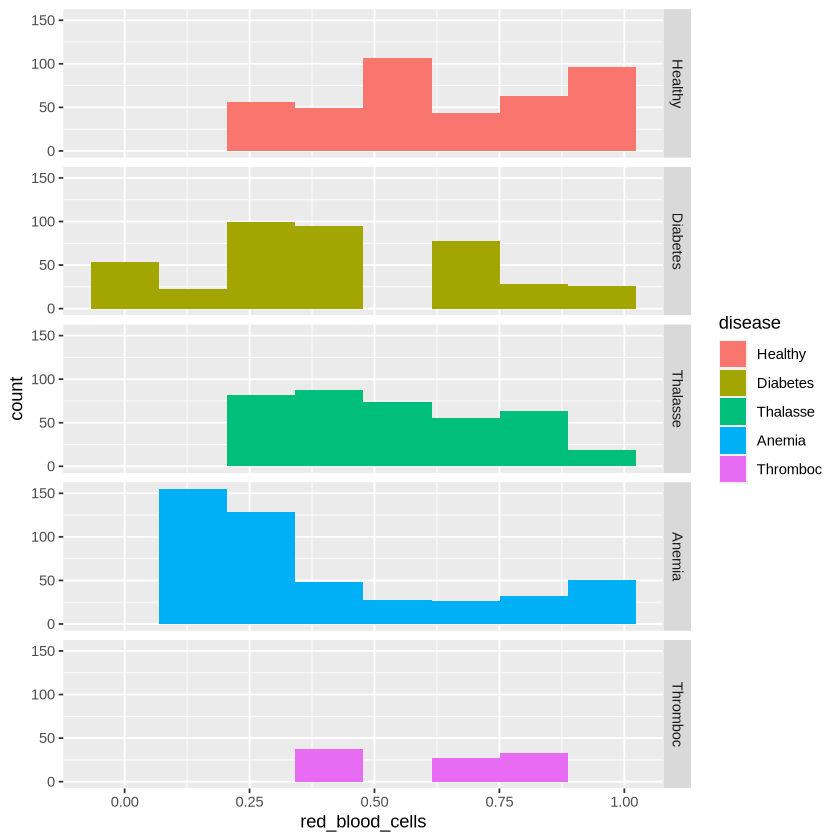

In [4]:
# gUYS GYUS GUYS I FINALLY FOUND SOMETHING MEANINGFUL
# Anemia is a condition where a person doesnt have enough health red blood cells
# And look look at the histograms anemic people are more on the low side of "red_blood_cells"
heart_rate_histogram <- training_blood_samples |> 
                        ggplot(aes(x=red_blood_cells, fill = disease)) +
                        geom_histogram(bins = 8) +
                        facet_grid(rows = vars(disease))
heart_rate_histogram